In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, geopandas as gpd, datetime, glob, math, openpyxl
import matplotlib.pyplot as plt, matplotlib.dates as mdates
from statistics import mean
from scipy import stats
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

plt.rcParams['figure.dpi'] = 300

### 1st dose data

In [2]:
#'full' data from 04/03/21 to present

all_weekly_data = []
all_weekly_dates = []
all_weekly_pop_data = []

for i,f in enumerate(glob.glob("C:/Users/joshb/Desktop/MSc Project/Data/PHE/Weekly/Full data/*.xlsx")):
    if i%2==0:
        print(i+10, end=' ')
    
    all_weekly_dates.append(list(pd.read_excel(f, engine='openpyxl', sheet_name='LTLA',
                                      index_col=None, usecols = "C", header = 6, nrows=0).columns)[0])
    
    all_weekly_data.append(pd.read_excel(f, engine='openpyxl', sheet_name='LTLA',header=[10,11]))
    
    all_weekly_pop_data.append(pd.read_excel(f, engine='openpyxl', sheet_name='Population estimates (NIMS)',
                                             header=[11,12]))

10 12 14 16 18 20 22 24 26 28 30 32 34 

In [3]:
data = list(zip(all_weekly_dates,all_weekly_data))
pop_data = list(zip(all_weekly_dates,all_weekly_pop_data))

In [4]:
all_vac1_data1 = []

for df in [tup[1] for tup in data]:
    df.columns = df.columns.to_flat_index()
    df1 = df.filter(like='1st', axis=1)
    df2 = df1[df1.columns.drop(list(df1.filter(like='Cumulative')))]
    df3 = df1[df2.columns.drop(list(df2.filter(like='80+.1')))]
    df4 = df3.iloc[0]
    all_vac1_data1.append(df4)

In [5]:
all_vac1_data2 = []

for df in [tup[1] for tup in data]:
    df.columns = df.columns.to_flat_index()
    df1 = df.filter(like='at least 1', axis=1).iloc[0][:-2]
    all_vac1_data2.append(df1)

In [6]:
all_vac1_data1 = all_vac1_data1[8:]
all_vac1_data2 = all_vac1_data2[:8]
all_vac1_data3 = all_vac1_data2 + all_vac1_data1
all_vac1_data3 = list(zip(all_weekly_dates,all_vac1_data3))

In [7]:
all_vac1_data4 = []

for df in [tup[1] for tup in all_vac1_data3]:
    df.index = [tup[1] for tup in df.index]
    all_vac1_data4.append(df)

In [8]:
all_vac1_data = list(zip(all_weekly_dates,all_vac1_data4))

###### Partial Data (Replication of Above)

In [9]:
#'partial' data from 31/12/20 to 25/02/21

partial_all_weekly_data = []
partial_all_weekly_dates = []
partial_all_weekly_pop_data = []

for i,f in enumerate(glob.glob("C:/Users/joshb/Desktop/MSc Project/Data/PHE/Weekly/Partial data/*.xlsx")):
#    if i%5==0:
    print(i, end=' ')
    
    partial_all_weekly_dates.append(list(pd.read_excel(f, engine='openpyxl', 
                                                       sheet_name='Vaccinations by Region & Age',index_col=None, 
                                                       usecols = "C", header = 6, nrows=0).columns)[0])
    
    partial_all_weekly_data.append(pd.read_excel(f, engine='openpyxl', sheet_name='Vaccinations by Region & Age',
                                                 header=[10,11]))
    
    if i in [4,5,7,8]:
        partial_all_weekly_pop_data.append(pd.read_excel(f, engine='openpyxl', sheet_name='Population estimates',
                                             header=[11,12]))
    else:
        partial_all_weekly_pop_data.append('No population data')

0 1 2 3 4 5 6 7 8 

In [10]:
partial_data = list(zip(partial_all_weekly_dates,partial_all_weekly_data))
partial_pop_data = list(zip(partial_all_weekly_dates,partial_all_weekly_pop_data))

In [11]:
partial_all_vac1_data1 = []

for df in [tup[1] for tup in partial_data]:
    df.columns = df.columns.to_flat_index()
    df1 = df.filter(like='1st', axis=1).iloc[0][:-1]
    partial_all_vac1_data1.append(df1)

In [12]:
for i,df in enumerate(partial_all_vac1_data1):
    partial_all_vac1_data1[i].index = [tup[1] for tup in partial_all_vac1_data1[i].index]
    partial_all_vac1_data1[i] = partial_all_vac1_data1[i][~partial_all_vac1_data1[i].index.str.contains('Per')]

In [13]:
partial_all_vac1_data1[0].index = partial_all_vac1_data1[2].index
partial_all_vac1_data1[1].index = partial_all_vac1_data1[2].index

In [14]:
partial_all_vac1_data = list(zip(partial_all_weekly_dates,partial_all_vac1_data1))

### Population data

In [15]:
all_pop_data = []

for df in [tup[1] for tup in pop_data]:
    df1 = df.filter(like='Population estimates', axis=1)
    df1.columns = [tup[1] for tup in list(df1.columns)]
    df2 = df1.iloc[0]
    df3 = df2[~df2.index.astype(str).str.contains('\.')==True]
    df4 = df3.drop(labels=['18+','16+'], errors='ignore')
    all_pop_data.append(df4)

In [16]:
pop_data = list(zip(all_weekly_dates,all_pop_data))

###### Partial Data (Replication of Above)

In [17]:
partial_pop_data = list(zip(partial_all_weekly_dates,partial_all_weekly_pop_data))

In [18]:
partial_all_pop_data = []

for df in [tup[1] for tup in partial_pop_data]:
    if type(df) == str and df== 'No population data':
        partial_all_pop_data.append(df)
        continue
    else:
        df1 = df.filter(like='Population estimates', axis=1)
        df1.columns = [tup[1] for tup in list(df1.columns)]
        df2 = df1.iloc[0]
        df3 = df2[~df2.index.astype(str).str.contains('\.')==True]
        df4 = df3.drop(labels=['65+ estimated population','70+ estimated population','Total estimated population 16+'], errors='ignore')
        partial_all_pop_data.append(df4)

In [19]:
partial_pop_data = list(zip(partial_all_weekly_dates,partial_all_pop_data))

In [20]:
for i in range(0,4):
    partial_pop_data[i] = (partial_pop_data[i][0],partial_pop_data[4][1])

partial_pop_data[6] = (partial_pop_data[6][0],partial_pop_data[7][1])

In [21]:
for i,df in enumerate([tup[1] for tup in partial_pop_data]):
    partial_pop_data[i][1][partial_pop_data[i][1].index.str.contains('Under 80')] = pop_data[0][1]['Under 16'] + pop_data[0][1]['16-64'] + pop_data[0][1]['65-69'] + pop_data[0][1]['70-74'] + pop_data[0][1]['75-79']
    partial_pop_data[i][1][partial_pop_data[i][1].index.str.contains('Under 70')] = pop_data[0][1]['Under 16'] + pop_data[0][1]['16-64'] + pop_data[0][1]['65-69']
    partial_pop_data[i][1][partial_pop_data[i][1].index.str.contains('Under 65')] = pop_data[0][1]['Under 16'] + pop_data[0][1]['16-64']
    partial_pop_data[i][1][partial_pop_data[i][1].index.str.contains('80\+')] = pop_data[0][1]['80+']
    partial_pop_data[i][1][partial_pop_data[i][1].index.str.contains('70-74')] = pop_data[0][1]['70-74']
    partial_pop_data[i][1][partial_pop_data[i][1].index.str.contains('75-79')] = pop_data[0][1]['75-79']
    partial_pop_data[i][1][partial_pop_data[i][1].index.str.contains('65-69')] = pop_data[0][1]['65-69']

### Proportional data

In [22]:
weekly_pop_data = []

for i, df in enumerate(all_vac1_data):
    if len(all_vac1_data[i][1]) < len(pop_data[i][1]):
        foo = [(pop_data[i][1].index[0][:-2] + 
                str(int(pop_data[i][1].index[1][-2:])+1))]+ list(pop_data[i][1].index[2:])
        pop_data[i][1].values[1] = pop_data[i][1].values[0] + pop_data[i][1].values[1]
        faa = pop_data[i][1].values[1:]
        df = pd.DataFrame(faa,index=foo)
    else:
         df = pd.DataFrame(pop_data[i][1])
    weekly_pop_data.append(df)

In [23]:
for i,df in enumerate(weekly_pop_data):
    weekly_pop_data[i].columns = ['weekly pop.']

In [24]:
for i,df in enumerate(weekly_pop_data):
    weekly_pop_data[i]['date published'] = all_vac1_data[i][0]

In [25]:
weekly_vac1_pop_data = []

for i,df in enumerate(weekly_pop_data):
    df1 = pd.concat([df,[tup[1] for tup in all_vac1_data][i]], axis=1)
    weekly_vac1_pop_data.append(df1)

In [26]:
for i,df in enumerate(weekly_vac1_pop_data):
    weekly_vac1_pop_data[i] = weekly_vac1_pop_data[i].rename(columns={0:'# of dose 1'})

In [27]:
for i,df in enumerate(weekly_vac1_pop_data):
    weekly_vac1_pop_data[i]['% of dose 1'] = weekly_vac1_pop_data[i]['# of dose 1'].divide(
        weekly_vac1_pop_data[i]['weekly pop.'])

In [28]:
weekly_vac1_pop_data = pd.concat(weekly_vac1_pop_data)

In [29]:
weekly_vac1_pop_data = weekly_vac1_pop_data.sort_index()

In [30]:
#Renaming everything with appropriate names
weekly_vac1_pop_data.index.name = 'Age Groups'

In [31]:
#making 'date published' the index and 'Age Groups' a column
weekly_vac1_pop_data['Age Groups'] = weekly_vac1_pop_data.index
weekly_vac1_pop_data = weekly_vac1_pop_data.set_index('date published')

In [32]:
#restructure dataframe for better readability and plotting
weekly_vac1_pop_data = weekly_vac1_pop_data.pivot(columns='Age Groups', values='% of dose 1')

In [33]:
weekly_vac1_pop_data = weekly_vac1_pop_data.sort_index()

In [34]:
#convert dates to correct date format date/month/year
weekly_vac1_pop_data.index = pd.to_datetime(weekly_vac1_pop_data.index,infer_datetime_format=True)

In [35]:
weekly_vac1_pop_data = weekly_vac1_pop_data.sort_index()

###### Partial Data (Replication of Above)

In [36]:
for i,df in enumerate([tup[1] for tup in partial_pop_data]):
    partial_pop_data[i][1].index = partial_all_vac1_data[i][1].index

In [37]:
for i,df in enumerate([tup[1] for tup in partial_pop_data]):
    partial_all_vac1_data[i][1].name = '# of dose 1'
    partial_pop_data[i][1].name = 'weekly pop.'

In [38]:
partial_weekly_vac1_pop_data = []

for i,df in enumerate([tup[1] for tup in partial_pop_data]):
    df1 = pd.DataFrame(partial_pop_data[i][1])
    df2 = pd.DataFrame(partial_all_vac1_data[i][1])
    df = pd.concat([df1,df2],axis=1)
    partial_weekly_vac1_pop_data.append(df)

In [39]:
for i,df in enumerate(partial_weekly_vac1_pop_data):
    df['date published'] = partial_all_vac1_data[i][0]

In [40]:
for i,df in enumerate(partial_weekly_vac1_pop_data):
    partial_weekly_vac1_pop_data[i]['% of dose 1'] = partial_weekly_vac1_pop_data[i]['# of dose 1'].divide(
        partial_weekly_vac1_pop_data[i]['weekly pop.'])

In [41]:
partial_weekly_vac1_pop_data = pd.concat(partial_weekly_vac1_pop_data)

In [42]:
partial_weekly_vac1_pop_data = partial_weekly_vac1_pop_data.sort_index()

In [43]:
#Renaming everything with appropriate names
partial_weekly_vac1_pop_data.index.name = 'Age Groups'

In [44]:
#making 'date published' the index and 'Age Groups' a column
partial_weekly_vac1_pop_data['Age Groups'] = partial_weekly_vac1_pop_data.index
partial_weekly_vac1_pop_data = partial_weekly_vac1_pop_data.set_index('date published')

In [45]:
#restructure dataframe for better readability and plotting
partial_weekly_vac1_pop_data = partial_weekly_vac1_pop_data.pivot(columns='Age Groups', values='% of dose 1')

In [46]:
#convert dates to correct date format date/month/year
partial_weekly_vac1_pop_data.index = pd.to_datetime(partial_weekly_vac1_pop_data.index,infer_datetime_format=True)

In [47]:
partial_weekly_vac1_pop_data = partial_weekly_vac1_pop_data.sort_index()

In [48]:
weekly_vac1_pop_data = pd.concat([partial_weekly_vac1_pop_data,weekly_vac1_pop_data])

In [49]:
weekly_vac1_pop_data = weekly_vac1_pop_data.sort_index(axis=1)

In [50]:
path = './Desktop/MSc Project/Data/'
weekly_vac1_pop_data.to_csv(path + 'weekly_vac1_prop_data.csv')

C:\Users\joshb\AppData\Local\Temp/ipykernel_9212/33329064.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(


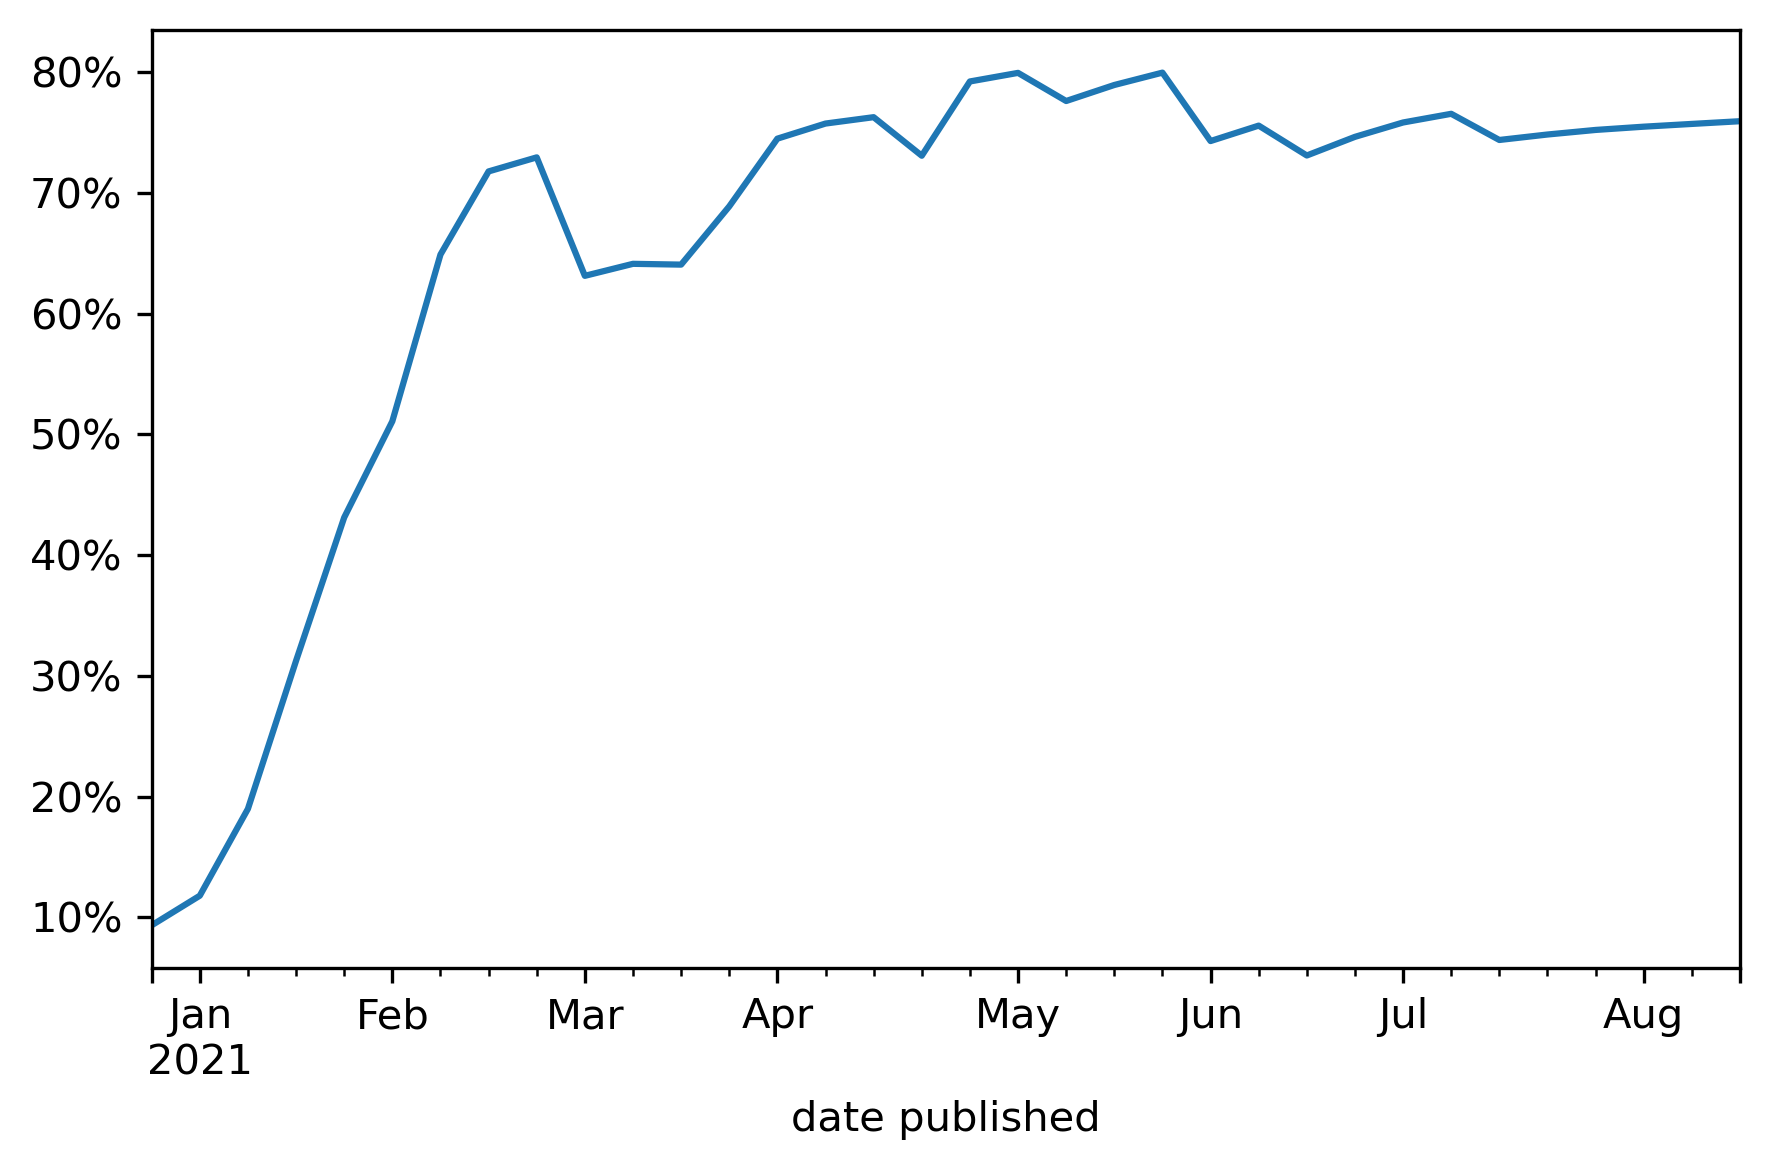

In [51]:
ax = weekly_vac1_pop_data.mean(axis=1).plot()
# manipulate
vals = ax.get_yticks()
ax.set_yticklabels(
    ['{:,.0%}'.format(y) for y in vals])
    #plt.title('Cumulative 1st dose vaccine rate by date',fontsize=17)

plt.tight_layout()
plt.savefig('./Desktop/MSc Project/Outputs/Cumulative 1st dose vaccine rate by date_figure.png')
plt.show()

In [52]:
age_groups = list(weekly_vac1_pop_data.columns)

In [53]:
weekly_vac1_pop_data['80+'][8:18] = np.linspace(
    weekly_vac1_pop_data['80+'][8],weekly_vac1_pop_data['80+'][17],10)

weekly_vac1_pop_data['75-79'][8:18] = np.linspace(
    weekly_vac1_pop_data['75-79'][8],weekly_vac1_pop_data['75-79'][17],10)

In [54]:
age_groups1 = age_groups[1:]

C:\Users\joshb\AppData\Local\Temp/ipykernel_9212/4059079954.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])


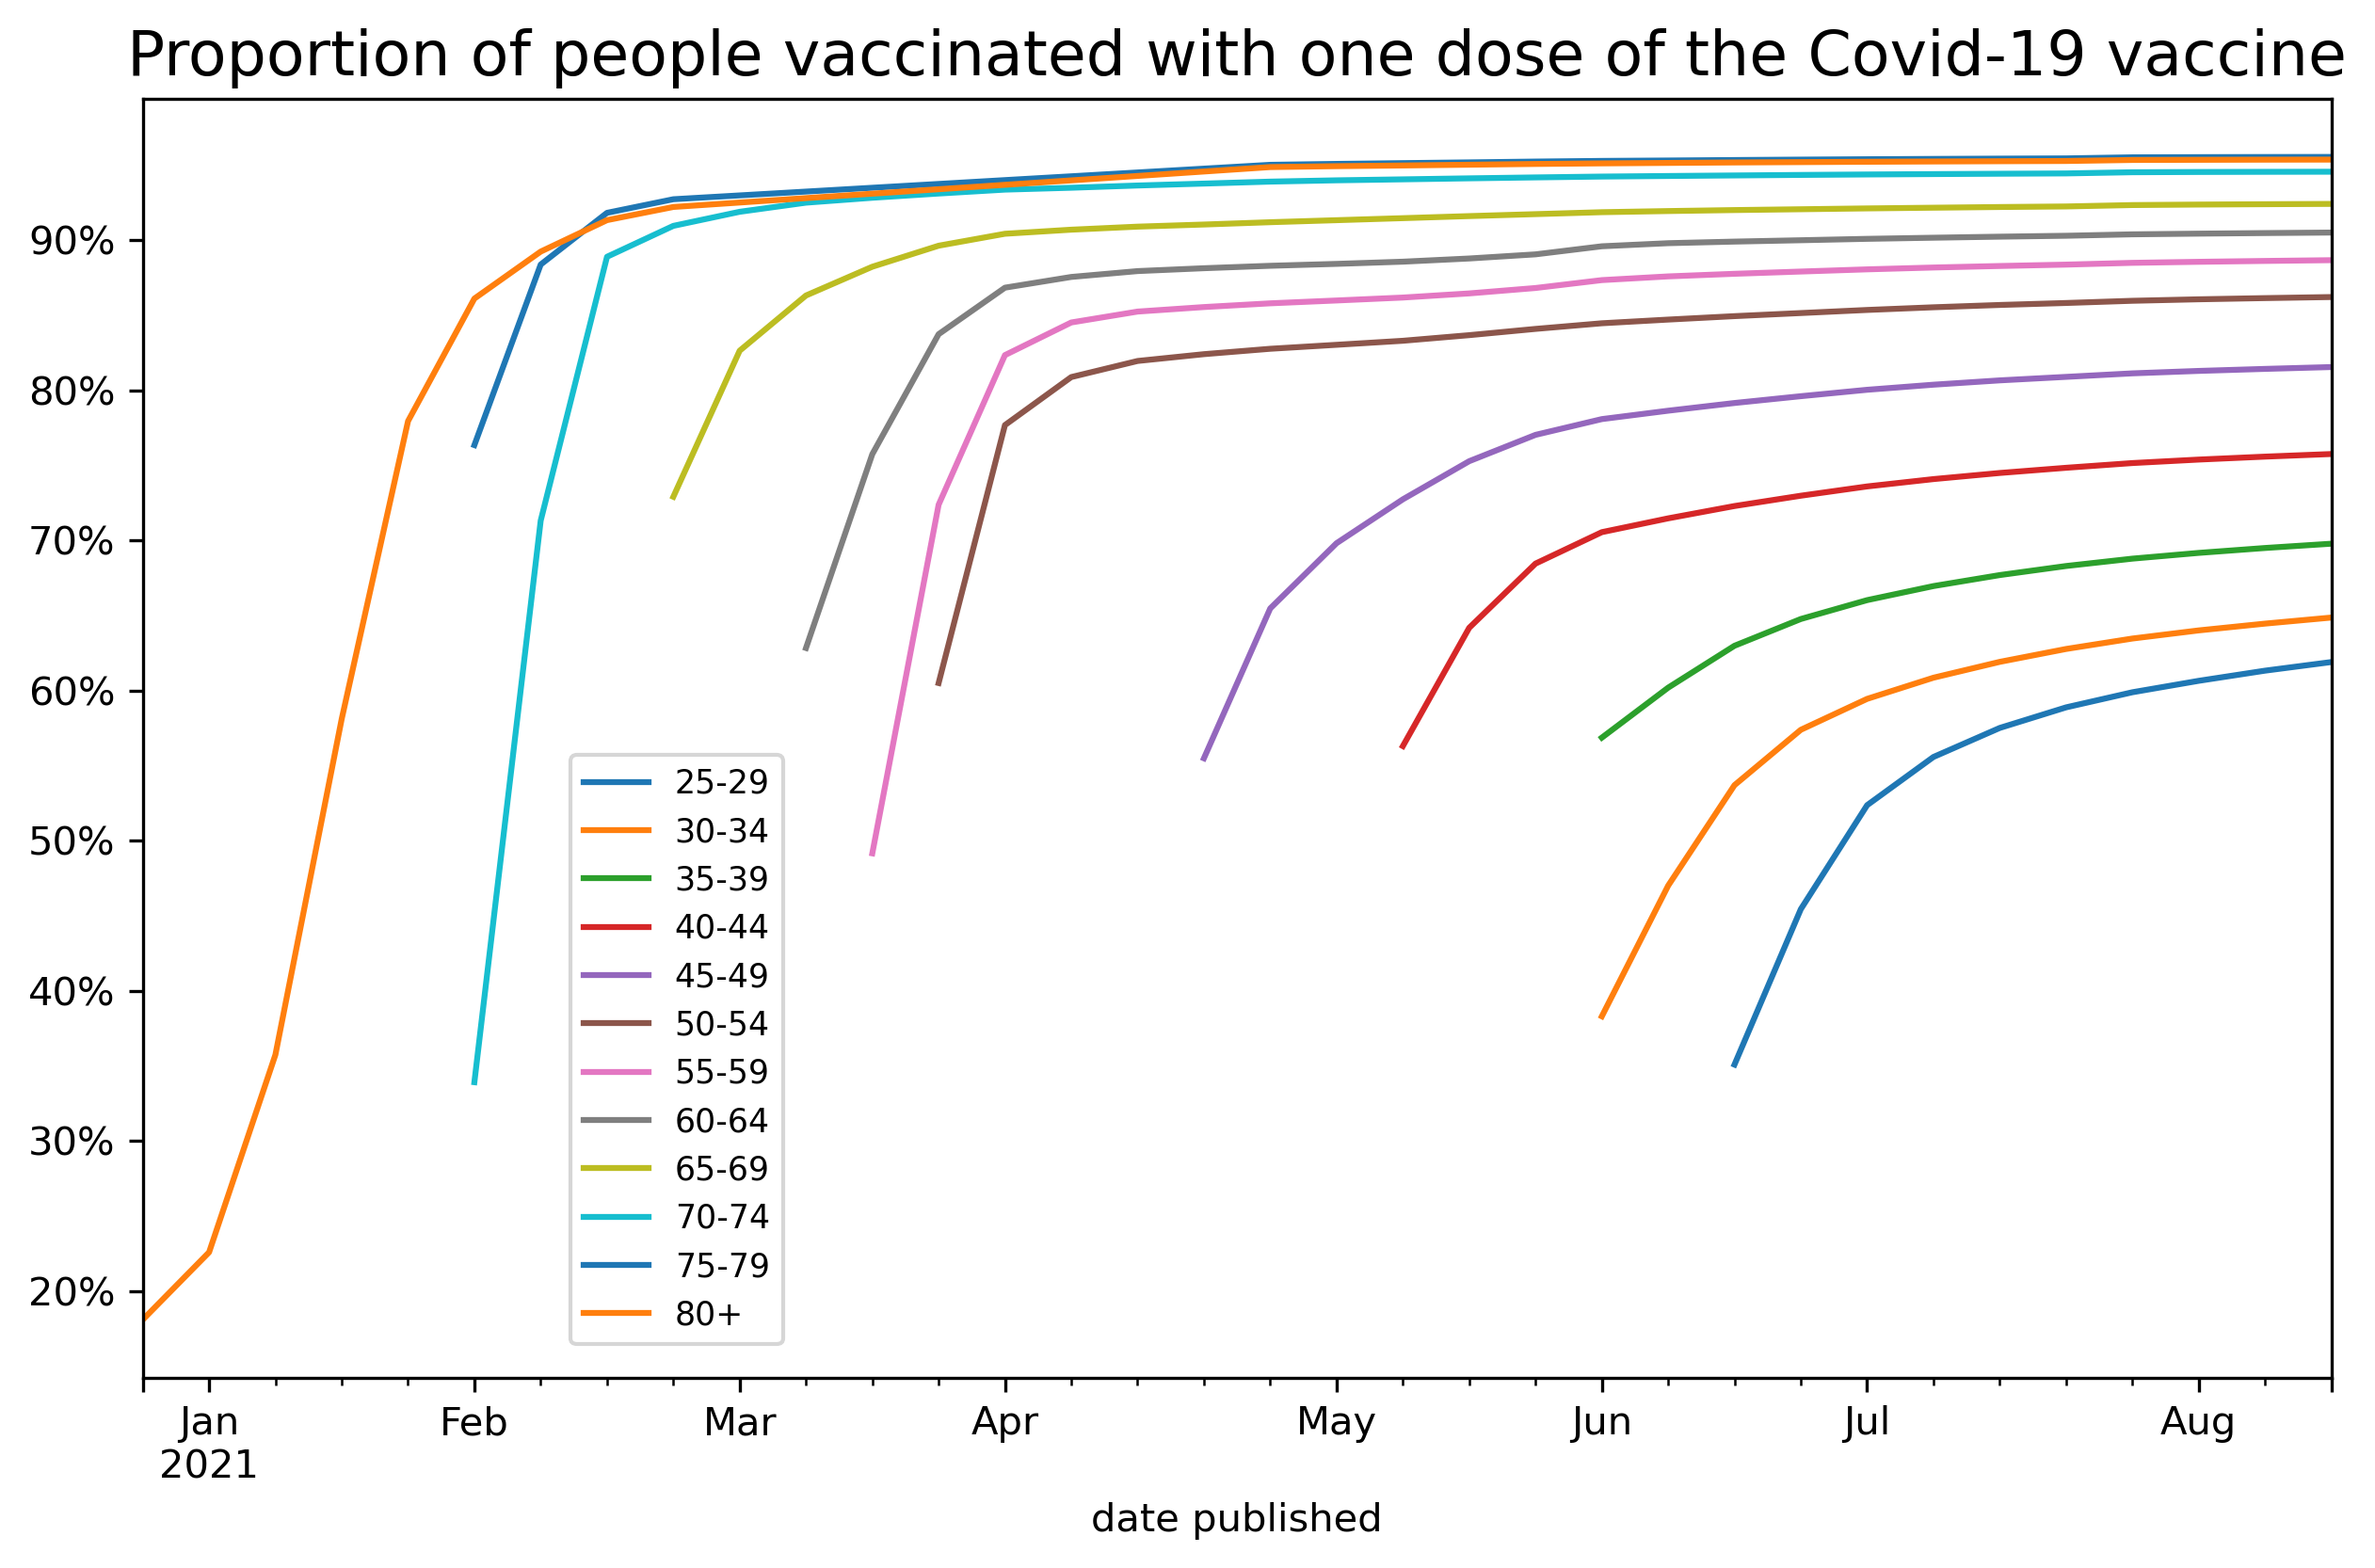

In [55]:
#plot it all seperated by age group
ax = weekly_vac1_pop_data['25-29'].plot(figsize=(10, 6))
weekly_vac1_pop_data['30-34'].plot(ax=ax),weekly_vac1_pop_data['35-39'].plot(ax=ax),
weekly_vac1_pop_data['40-44'].plot(ax=ax),weekly_vac1_pop_data['45-49'].plot(ax=ax),
weekly_vac1_pop_data['50-54'].plot(ax=ax),weekly_vac1_pop_data['55-59'].plot(ax=ax),
weekly_vac1_pop_data['60-64'].plot(ax=ax),weekly_vac1_pop_data['65-69'].plot(ax=ax),
weekly_vac1_pop_data['70-74'].plot(ax=ax),weekly_vac1_pop_data['75-79'].plot(ax=ax),
weekly_vac1_pop_data['80+'].plot(ax=ax)

# manipulate
vals = ax.get_yticks()
#print(vals)
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])

plt.legend(labels=age_groups1, fontsize='small', bbox_to_anchor=(0, 0.2, 0.3, 0.3))
plt.title('Proportion of people vaccinated with one dose of the Covid-19 vaccine',fontsize=16)

plt.savefig('./Desktop/MSc Project/Outputs/Proportion of people vaccinated with one dose of the Covid-19 vaccine_figure.png')
plt.show()

In [56]:
weekly_vac1_pop_data

,18-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,...,Under 25,Under 30,Under 40,Under 45,Under 50,Under 55,Under 60,Under 65,Under 70,Under 80
date published,,,,,,,,,,,,,,,,,,,,,
2020-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00613513
2021-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0102754
2021-01-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.022534
2021-01-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0439072
2021-01-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0828167
2021-02-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0796815,NaN
2021-02-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10606,NaN
2021-02-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.15035,NaN
2021-02-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.729011,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.158764,NaN,NaN


##### Asssymptotic Vaccine Saturation

Vaccine adoption rates eventually 'tail off'. Here we will explore how and when this tailing off happens between different factors, e.g. age.

In [57]:
#function that takes in dates(as index) and cumulative vaccine rates (as data) and spits out the date and %
#at which the curve starts to 'tail off'

def asymptote_date_and_value(column, asymptote_value):
    new_column = list(column)    
    N= 500
    difflist = new_column[::-1]
    
    for i,val in enumerate(difflist[:-1]):        
        diff = difflist[i]-difflist[i+1]
        if diff < asymptote_value:
            N = i
        else:
            break
    
    if N == 500:
        return False
    else:
        return column.index[-(N+2)], column[-(N+2)]

In [58]:
asymptote_value = 0.01

In [59]:
weekly_vac1_pop_data.columns[:12]

Index(['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59',
       '60-64', '65-69', '70-74', '75-79'],
      dtype='object')

In [60]:
ages, tail_off_dates, tail_off_values = [],[],[]

for col in weekly_vac1_pop_data.columns[:12]:
    ages.append(col)
    date, value = asymptote_date_and_value(column = weekly_vac1_pop_data[col],asymptote_value = asymptote_value)
    tail_off_dates.append(date),tail_off_values.append(value)
    
tail_off_plot = list(zip(ages,tail_off_dates))
tail_off_dates = pd.to_datetime(tail_off_dates)

In [61]:
asymptote_date_and_value(column=weekly_vac1_pop_data.mean(axis=1),asymptote_value=asymptote_value)

(Timestamp('2021-07-01 00:00:00'), 0.7581987384368817)

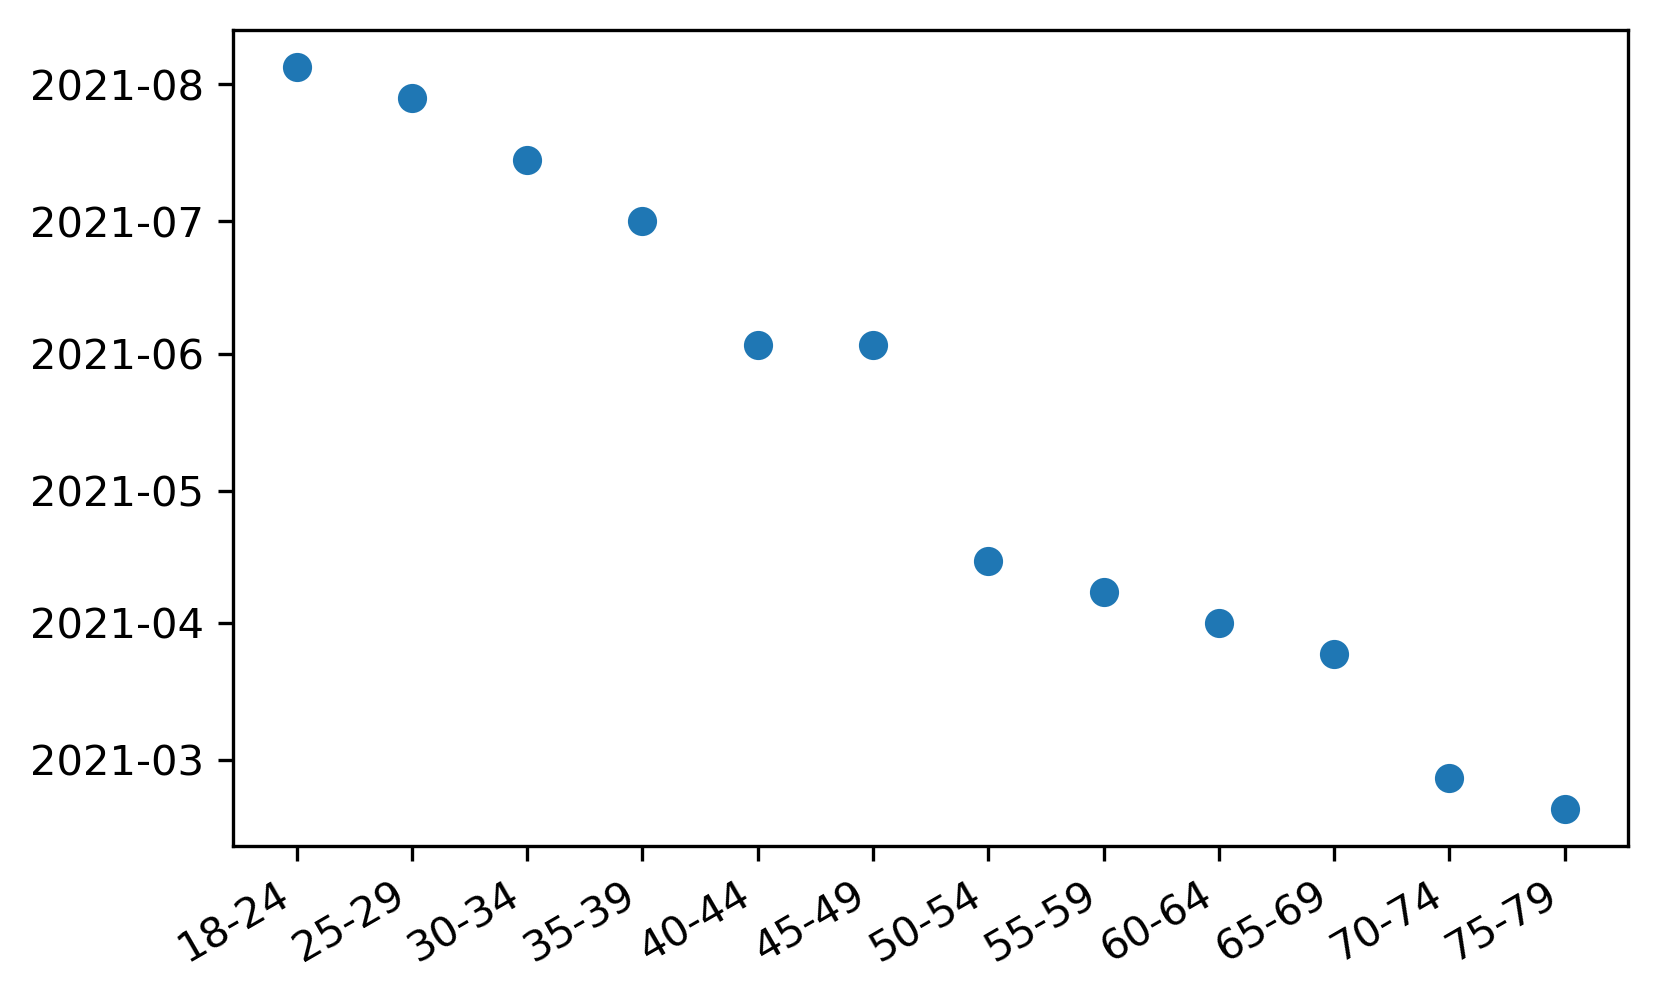

In [62]:
fig, ax = plt.subplots()
ax.plot_date(ages, tail_off_dates),fig.autofmt_xdate()
plt.savefig('./Desktop/MSc Project/Outputs/age group vs tail-off dates dots.png')

In [63]:
ages[:-1][::-1]

['70-74',
 '65-69',
 '60-64',
 '55-59',
 '50-54',
 '45-49',
 '40-44',
 '35-39',
 '30-34',
 '25-29',
 '18-24']

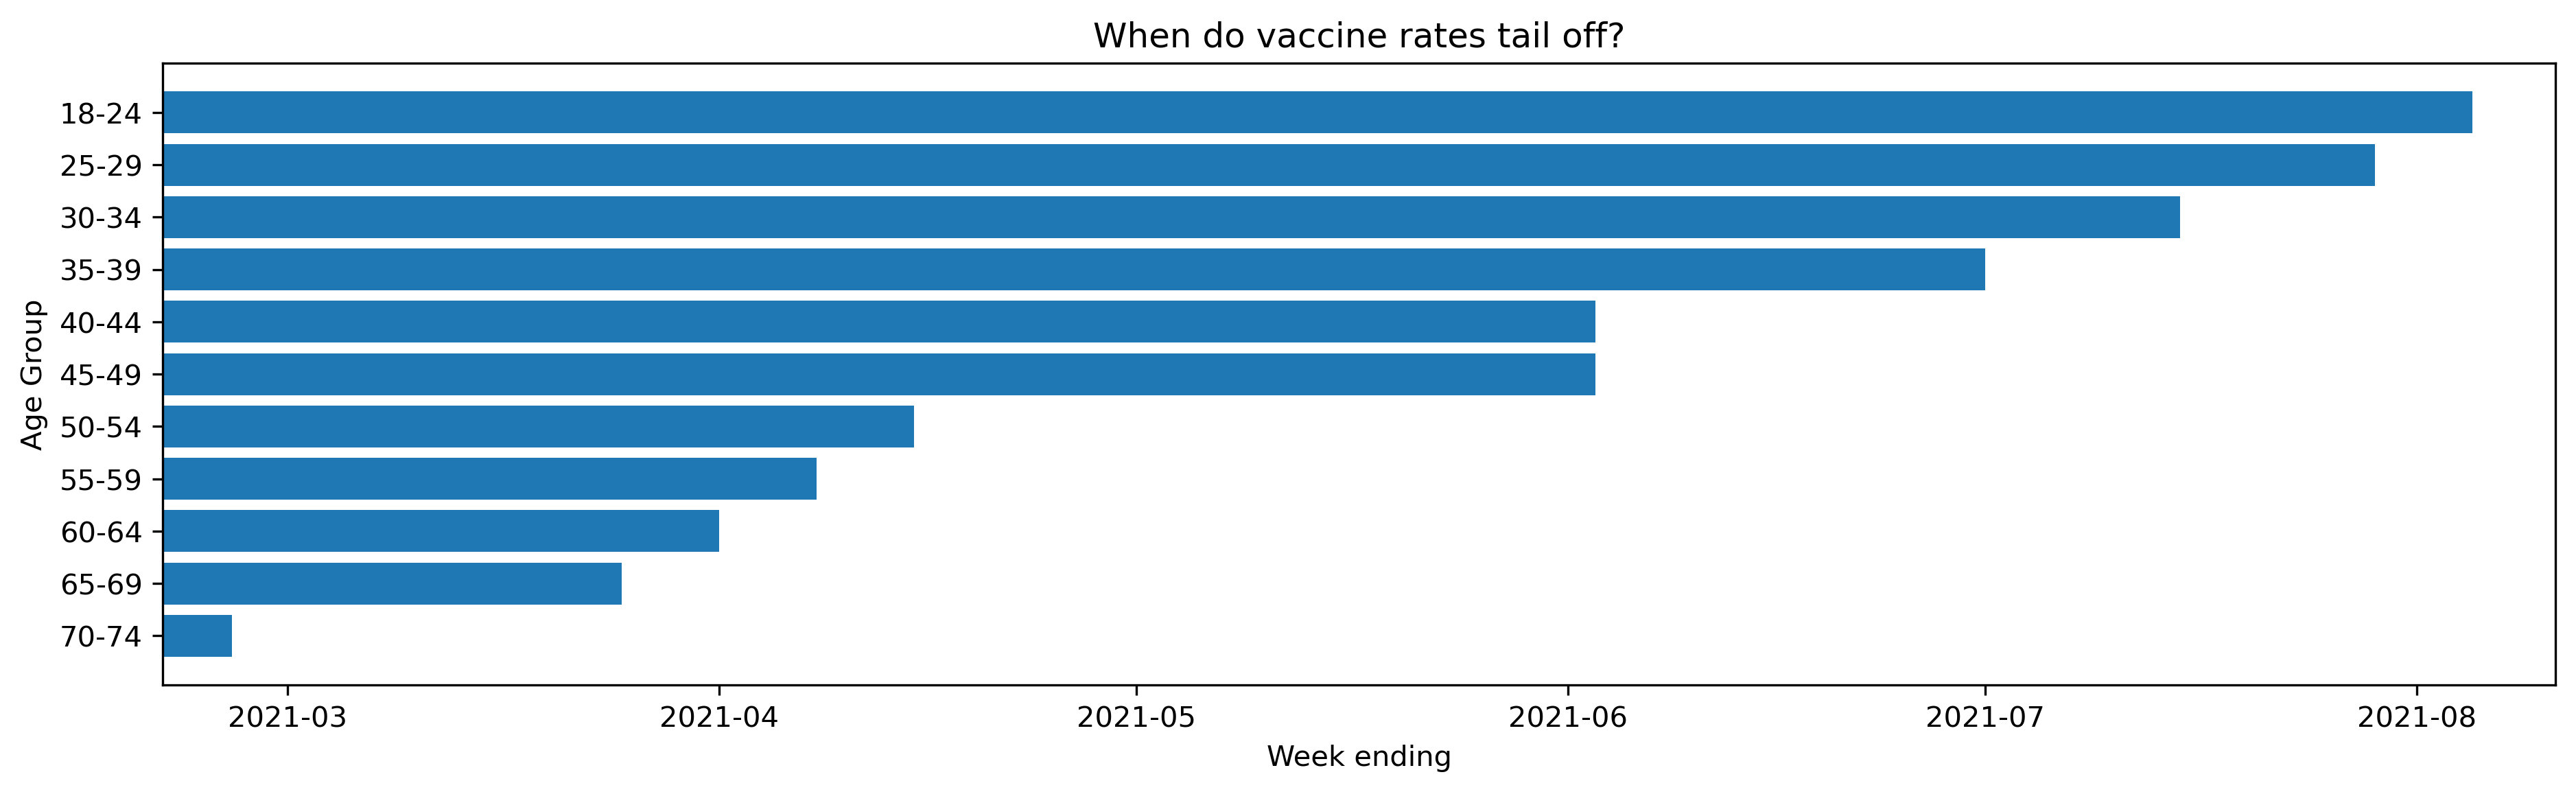

In [64]:
plt.figure(figsize=(15, 4), dpi=300),plt.xlim(18678,18850),plt.title('When do vaccine rates tail off?')
plt.xlabel('Week ending'),plt.ylabel('Age Group'),plt.barh(ages[:-1][::-1],tail_off_dates[:-1][::-1])

plt.savefig('./Desktop/MSc Project/Outputs/When do vaccine rates tail off.png')

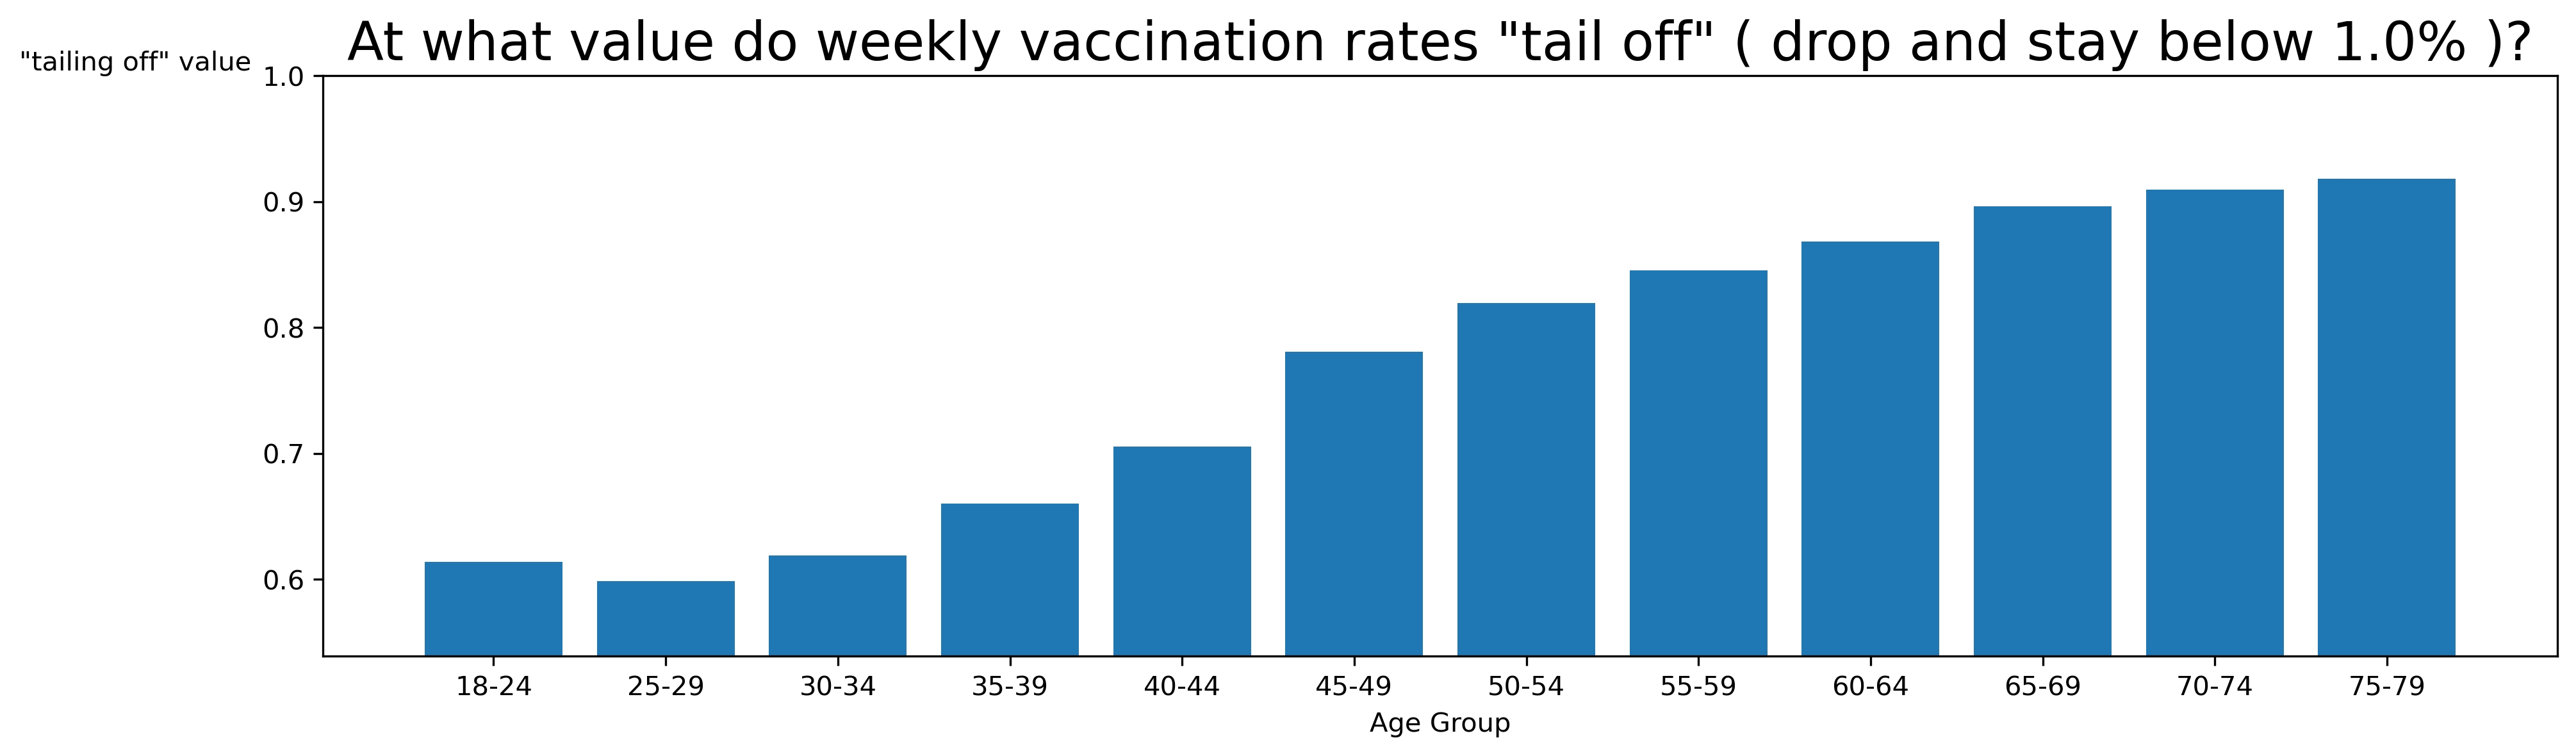

In [65]:
plt.figure(figsize=(15, 4), dpi=300),plt.ylim(0.9*min(tail_off_values),1)
plt.title(
    'At what value do weekly vaccination rates "tail off" ( drop and stay below ' + str(asymptote_value*100) + '% )?',
fontsize=20)
plt.xlabel('Age Group'),plt.ylabel('"tailing off" value',rotation=0, loc='top'),plt.bar(ages,tail_off_values)

plt.savefig('./Desktop/MSc Project/Outputs/At what value do weekly vaccination rates tail off_figure.png')
plt.show()

In [66]:
ages

['18-24',
 '25-29',
 '30-34',
 '35-39',
 '40-44',
 '45-49',
 '50-54',
 '55-59',
 '60-64',
 '65-69',
 '70-74',
 '75-79']

In [67]:
mean(tail_off_values)

0.7695882731959232